Nội dung bài viết nhằm tinh chỉnh bộ tham số và lựa chọn ra những thuộc tính đặc trưng nhất giúp cho mô hình dự đoán XGBoost có hiệu suất cao hơn. Dữ liệu ở đây là file product_train.csv. Nguồn: https://www.kaggle.com/datasets/aditya954/back-order-data-set

# Đọc dữ liệu và xử lý dữ liệu trước khi đưa vào mô hình XGBoost

## Đọc dữ liệu

In [1]:
import pandas as pd
import numpy as np
#đọc dữ liệu từ file
df = pd.read_csv("E:\Jupyter NoteBook\XGBoost\product_train.csv")
dataset=df.values

Giải thích về Ý nghĩa từng cột trong bảng dữ liệu product_train.csv
- sku: Mã sản phẩm (Product ID) - Định danh duy nhất cho từng sản phẩm trong tập dữ liệu.

- national_inv: Số lượng hàng tồn kho (inventory count) ở mức quốc gia - Đây là số lượng sản phẩm hiện có trong kho hàng.

- lead_time: Thời gian chờ (lead time) để có sẵn hàng hóa - Đây là thời gian mà nhà cung cấp mất để cung cấp hàng sau khi đặt hàng.

- in_transit_qty: Số lượng hàng đang vận chuyển (In transit quantity) - Đây là số lượng sản phẩm đang được vận chuyển từ nhà cung cấp đến kho.

- forecast_3_month: Dự báo doanh số trong 3 tháng tới (3 month forecast for sale) - Đây là dự báo số lượng sản phẩm được dự đoán sẽ được bán trong 3 tháng tới.

- forecast_6_month: Dự báo doanh số trong 6 tháng tới (6 month forecast for sale) - Đây là dự báo số lượng sản phẩm được dự đoán sẽ được bán trong 6 tháng tới.

- forecast_9_month: Dự báo doanh số trong 9 tháng tới (9 month forecast for sale) - Đây là dự báo số lượng sản phẩm được dự đoán sẽ được bán trong 9 tháng tới.

- sales_1_month: Số lượng sản phẩm đã bán trong 1 tháng gần nhất (actual sales figure for last 1 month) - Đây là số lượng sản phẩm thực tế đã được bán trong tháng gần nhất.

- sales_3_month: Số lượng sản phẩm đã bán trong 3 tháng gần nhất (actual sales figure for last 3 months) - Đây là số lượng sản phẩm thực tế đã được bán trong 3 tháng gần nhất.

- sales_6_month: Số lượng sản phẩm đã bán trong 6 tháng gần nhất (actual sales figure for last 6 months) - Đây là số lượng sản phẩm thực tế đã được bán trong 6 tháng gần nhất.

- sales_9_month: Số lượng sản phẩm đã bán trong 9 tháng gần nhất (actual sales figure for last 9 months) - Đây là số lượng sản phẩm thực tế đã được bán trong 9 tháng gần nhất.

- min_bank: Số lượng sản phẩm tối thiểu cần tồn kho (Minimum recommend amount to stock) - Đây là số lượng tối thiểu của sản phẩm mà kho hàng nên tồn trữ để đáp ứng nhu cầu.
- potential_issue: Vấn đề tiềm tàng (Source issue for part identified) - Cột này chỉ ra sự tồn tại của vấn đề tiềm tàng trong nguồn cung cấp cho một phần cụ thể. Giá trị "Yes" cho biết có vấn đề tiềm tàng, trong khi giá trị "No" cho biết không có vấn đề tiềm tàng.

- pieces_past_due: Số lượng mặt hàng quá hạn (Parts overdue from source) - Đây là số lượng sản phẩm đã đặt hàng nhưng chưa được giao đúng hẹn từ nguồn cung cấp.

- perf_6_month_avg: Hiệu suất nguồn cung cấp trong 6 tháng trước đó (Source performance for prior 6-month period) - Đây là chỉ số hiệu suất của nguồn cung cấp dựa trên dữ liệu trong 6 tháng trước.

- perf_12_month_avg: Hiệu suất nguồn cung cấp trong 12 tháng trước đó (Source performance for prior 12-month period) - Đây là chỉ số hiệu suất của nguồn cung cấp dựa trên dữ liệu trong 12 tháng trước.

- local_bo_qty: Số lượng đơn hàng cục bộ chậm trễ (Amount of stock orders overdue) - Đây là số lượng đơn hàng chậm trễ đối với sản phẩm trong kho hàng.

- deck_risk: Rủi ro về bộ phận (Part risk flag) - Cột này chỉ ra rủi ro liên quan đến bộ phận của sản phẩm. Giá trị "Yes" cho biết có rủi ro, trong khi giá trị "No" cho biết không có rủi ro.

- oe_constraint: Rủi ro về ràng buộc đơn đặt hàng (Part risk flag) - Cột này chỉ ra rủi ro liên quan đến ràng buộc của đơn đặt hàng. Giá trị "Yes" cho biết có rủi ro, trong khi giá trị "No" cho biết không có rủi ro.

- ppap_risk: Rủi ro liên quan đến PPAP (Part risk flag) - Cột này chỉ ra rủi ro liên quan đến quy trình phê duyệt sản phẩm trước sản xuất (PPAP). Giá trị "Yes" cho biết có rủi ro, trong khi giá trị "No" cho biết không có rủi ro.

- stop_auto_buy: Dừng mua tự động (Part risk flag) - Cột này chỉ ra rủi ro liên quan đến việc dừng mua hàng tự động. Giá trị "Yes" cho biết có rủi ro, trong khi giá trị "No" cho biết không có rủi ro.
- rev_stop: Dừng xem xét (Part risk flag) - Cột này chỉ ra rủi ro liên quan đến việc dừng xem xét sản phẩm. Giá trị "Yes" cho biết có rủi ro, trong khi giá trị "No" cho biết không có rủi ro.

- went_on_backorder: Sản phẩm thực sự đã hết hàng (Product actually went on backorder) - Đây là giá trị mục tiêu mà mô hình dự đoán, có giá trị 0 hoặc 1. Giá trị 1 cho biết sản phẩm đã hết hàng (đã vào tình trạng backorder), trong khi giá trị 0 cho biết sản phẩm không hết hàng.

Mục tiêu ở đây là xây dựng mô hình dự đoán went_on_backorder dựa trên những cột thông tin còn lại

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250078 entries, 0 to 250077
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                250078 non-null  int64  
 1   national_inv       250078 non-null  int64  
 2   lead_time          250078 non-null  int64  
 3   in_transit_qty     250078 non-null  int64  
 4   forecast_3_month   250078 non-null  int64  
 5   forecast_6_month   250078 non-null  int64  
 6   forecast_9_month   250078 non-null  int64  
 7   sales_1_month      250078 non-null  int64  
 8   sales_3_month      250078 non-null  int64  
 9   sales_6_month      250078 non-null  int64  
 10  sales_9_month      250078 non-null  int64  
 11  min_bank           250078 non-null  int64  
 12  potential_issue    250078 non-null  object 
 13  pieces_past_due    250078 non-null  int64  
 14  perf_6_month_avg   250078 non-null  float64
 15  perf_12_month_avg  250078 non-null  float64
 16  lo

In [3]:
df['went_on_backorder'].value_counts()

went_on_backorder
No     248463
Yes      1615
Name: count, dtype: int64

## Xử lý dữ liệu 
Dữ liệu các cột objects ở đây tất cả đều có dạng là Yes/ No nên ta chuyển hết tất cả giá trị đó về 1 /0

In [4]:
#recode binary variables as 0 / 1 rather than No / Yes
for col in ['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']:    
    df[col]=pd.factorize(df[col])[0]

Chuyển tất cả các dòng có giá trị là -99 trong cột perf_12_month_avg và perf_6_month_avg rồi điền giá trị trung vị (median) của từng cột vào các giá trị NaN trong DataFrame df. Các giá trị NaN sẽ được thay thế bằng giá trị trung vị của cột tương ứng.
Sau đó xóa cột "sku" khỏi bảng vì giá trị của cột "sku" không ảnh hưởng gì đến kết quả dự đoán và kết thúc phần xử lý dữ liệu trước khi đưa vào mô hình dự đoán.

In [5]:
df['perf_12_month_avg'].unique()
df['perf_6_month_avg']=df['perf_6_month_avg'].replace(-99, np.NaN)
df['perf_12_month_avg']=df['perf_12_month_avg'].replace(-99, np.NaN)
df.fillna(df.median(), inplace=True)
df=df.drop(['sku'],axis=1)

# Xây dựng mô hình XGBoost
## Chia dữ liệu thành 2 tập train, test


In [6]:
# Chia dữ liệu train, test

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.1, random_state=42)

x_train = train.drop(columns=['went_on_backorder'])
y_train = train['went_on_backorder']

X_test = test.drop(columns=['went_on_backorder'])
Y_test = test['went_on_backorder']

## Huấn luyện dữ liệu với bộ tham số ban đầu(chưa tinh chỉnh)

In [7]:
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree
from matplotlib import pyplot
from numpy import loadtxt
model_xgb = xgb.XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [8]:

acc = model_xgb.score(X_test, Y_test)
print(acc*100)

99.37220089571338


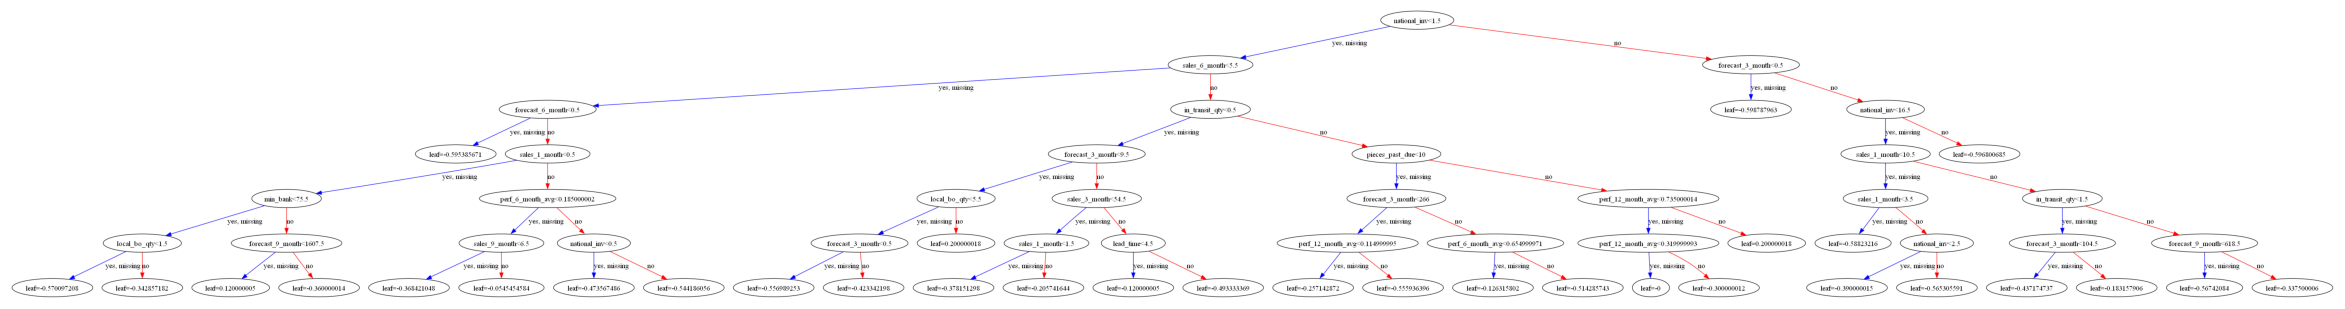

In [9]:
# plot single tree
plt.figure(figsize=(30, 25))  # Đặt kích thước ảnh
plot_tree(model_xgb, num_trees=0, ax=plt.gca())  # Vẽ cây thứ nhất (num_trees=0)
path = "product_train_tree.png"
plt.savefig(path, dpi=600)
pyplot.show()

# Hyperparemeter Tuning

## Bước 1: Cố định learning_rate và một số tham số ban đầu để tinh chỉnh n_estimators
Để quyết định tăng các tham số, chúng ta cần thiết lập một số giá trị ban đầu của các tham số khác. Hãy lấy các giá trị sau:
- max_depth = 6 : Giá trị này phải nằm trong khoảng từ 3-10. Tôi đã bắt đầu với 6, nhưng bạn cũng có thể chọn một số khác. 4-7 có thể là điểm khởi đầu tốt.
- min_child_weight = 1 : Giá trị nhỏ hơn được chọn vì đây là vấn đề về lớp mất cân bằng cao và các nút lá có thể có các nhóm kích thước nhỏ hơn.
- gamma = 0 : Cũng có thể chọn một giá trị nhỏ hơn như 0,1-0,2 để bắt đầu. Dù sao đi nữa, điều này sẽ được điều chỉnh sau.
- colsample_bytree = 0,8 : Đây là giá trị bắt đầu thường được sử dụng. Các giá trị điển hình nằm trong khoảng 0,5-0,9.
- scale_pos_weight=1 : Do mất cân bằng cao cấp.
Xin lưu ý rằng tất cả những điều trên chỉ là ước tính ban đầu và sẽ được điều chỉnh sau. Hãy lấy tốc độ học tập mặc định là 0,1 ở đây và kiểm tra số lượng cây tối ưu bằng hàm cv của xgboost. 

In [10]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from bayes_opt import BayesianOptimization
Y=df['went_on_backorder']
X=df.drop(['went_on_backorder'],axis=1)
# Định nghĩa hàm mục tiêu
def xgb_cv(n_estimators):
    model_xgb3 = xgb.XGBClassifier(learning_rate =0.1, max_depth=7, min_child_weight=1, gamma=0,colsample_bytree=0.8,n_jobs=-1,scale_pos_weight=1,n_estimators=int(n_estimators),random_state=42)
    scores = cross_val_score(model_xgb3, X, Y, cv=10, scoring='accuracy')
    return scores.mean()

# Định nghĩa không gian tìm kiếm cho các tham số
pbounds = {'n_estimators': (100, 200)}

# Tạo đối tượng Bayesian Optimization và tìm kiếm giá trị tối ưu
optimizer = BayesianOptimization(f=xgb_cv, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=10)

|   iter    |  target   | n_esti... |
-------------------------------------
| 1         | 0.9936    | 137.5     |
| 2         | 0.9936    | 195.1     |
| 3         | 0.9936    | 173.2     |
| 4         | 0.9936    | 159.9     |
| 5         | 0.9936    | 115.6     |
| 6         | 0.9937    | 180.3     |
| 7         | 0.9937    | 185.2     |
| 8         | 0.9936    | 100.0     |
| 9         | 0.9937    | 182.4     |
| 10        | 0.9936    | 148.9     |
| 11        | 0.9936    | 177.3     |
| 12        | 0.9936    | 188.7     |
| 13        | 0.9936    | 167.8     |
| 14        | 0.9936    | 127.5     |
| 15        | 0.9936    | 143.6     |


In [11]:
print(optimizer.max['params']['n_estimators'])

180.33045735180335


## Bước 2: Tinh chỉnh max_depth và min_child_weight

In [16]:
#Grid Search
from sklearn.model_selection import GridSearchCV, train_test_split
model_xgb4 = xgb.XGBClassifier(learning_rate =0.1,gamma=0,colsample_bytree=0.8,n_jobs=-1,scale_pos_weight=1,random_state=42,n_estimators=180)
# Định nghĩa lưới các giá trị tham số cần tìm kiếm
param_grid = {
    'max_depth':range(5,9,2),
    'min_child_weight':range(1,6,2)
}

# Sử dụng Grid Search với phương pháp k fold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(estimator=model_xgb4, param_grid=param_grid, scoring='accuracy',cv=kfold, verbose=1)
grid_search.fit(x_train, y_train)

# In ra kết quả tốt nhất và các giá trị tham số tương ứng
print("Best accuracy:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
print("Grid search results:")
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print("Accuracy:", mean_score, "Parameters:", params)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best accuracy: 0.9935620029324209
Best parameters: {'max_depth': 5, 'min_child_weight': 5}
Grid search results:
Accuracy: 0.9935264584351536 Parameters: {'max_depth': 5, 'min_child_weight': 1}
Accuracy: 0.9935264584351536 Parameters: {'max_depth': 5, 'min_child_weight': 3}
Accuracy: 0.9935620029324209 Parameters: {'max_depth': 5, 'min_child_weight': 5}
Accuracy: 0.9935220153729951 Parameters: {'max_depth': 7, 'min_child_weight': 1}
Accuracy: 0.9935175723108367 Parameters: {'max_depth': 7, 'min_child_weight': 3}
Accuracy: 0.9935220153729951 Parameters: {'max_depth': 7, 'min_child_weight': 5}


Sau đó chúng ta tiếp tục sử dụng Grid Search để tìm những giá trị quanh giá trị max kia để cho ra kết quả tốt nhất

In [18]:
#Grid Search
from sklearn.model_selection import GridSearchCV, train_test_split
model_xgb4 = xgb.XGBClassifier(learning_rate =0.1,gamma=0,colsample_bytree=0.8,n_jobs=-1,scale_pos_weight=1,random_state=42,n_estimators=180)
# Định nghĩa lưới các giá trị tham số cần tìm kiếm
param_grid = {
    'max_depth':[5,6,7],
    'min_child_weight':[4,5,6]
}

# Sử dụng Grid Search với phương pháp k fold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(estimator=model_xgb4, param_grid=param_grid, scoring='accuracy',cv=kfold, verbose=1)
grid_search.fit(x_train, y_train)

# In ra kết quả tốt nhất và các giá trị tham số tương ứng
print("Best accuracy:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
print("Grid search results:")
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print("Accuracy:", mean_score, "Parameters:", params)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best accuracy: 0.9935620029324209
Best parameters: {'max_depth': 5, 'min_child_weight': 5}
Grid search results:
Accuracy: 0.9935397876216289 Parameters: {'max_depth': 5, 'min_child_weight': 4}
Accuracy: 0.9935620029324209 Parameters: {'max_depth': 5, 'min_child_weight': 5}
Accuracy: 0.9935086861865198 Parameters: {'max_depth': 5, 'min_child_weight': 6}
Accuracy: 0.9934775847514107 Parameters: {'max_depth': 6, 'min_child_weight': 4}
Accuracy: 0.9934953570000443 Parameters: {'max_depth': 6, 'min_child_weight': 5}
Accuracy: 0.9935042431243615 Parameters: {'max_depth': 6, 'min_child_weight': 6}
Accuracy: 0.9934953570000443 Parameters: {'max_depth': 7, 'min_child_weight': 4}
Accuracy: 0.9935220153729951 Parameters: {'max_depth': 7, 'min_child_weight': 5}
Accuracy: 0.9935397876216288 Parameters: {'max_depth': 7, 'min_child_weight': 6}


## Bước 3: Chỉnh gamma
Bây giờ, hãy điều chỉnh giá trị gamma bằng cách sử dụng các tham số đã được điều chỉnh ở trên. Gamma có thể nhận nhiều giá trị khác nhau, nhưng tôi sẽ kiểm tra 5 giá trị ở đây. Bạn có thể đi vào các giá trị chính xác hơn.

In [19]:
#Grid Search
from sklearn.model_selection import GridSearchCV, train_test_split
model_xgb4 = xgb.XGBClassifier(learning_rate =0.1,max_depth=5,min_child_weight=5,colsample_bytree=0.8,n_jobs=-1,scale_pos_weight=1,random_state=42,n_estimators=180)
# Định nghĩa lưới các giá trị tham số cần tìm kiếm
param_grid = {
    'gamma':[i/10.0 for i in range(0,5)]
}

# Sử dụng Grid Search với phương pháp k fold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(estimator=model_xgb4, param_grid=param_grid, scoring='accuracy',cv=kfold, verbose=1)
grid_search.fit(x_train, y_train)

# In ra kết quả tốt nhất và các giá trị tham số tương ứng
print("Best accuracy:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
print("Grid search results:")
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print("Accuracy:", mean_score, "Parameters:", params)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best accuracy: 0.9935620029324209
Best parameters: {'gamma': 0.0}
Grid search results:
Accuracy: 0.9935620029324209 Parameters: {'gamma': 0.0}
Accuracy: 0.9935531168081042 Parameters: {'gamma': 0.1}
Accuracy: 0.9935309014973119 Parameters: {'gamma': 0.2}
Accuracy: 0.9935575598702627 Parameters: {'gamma': 0.3}
Accuracy: 0.9934864708757276 Parameters: {'gamma': 0.4}


## Bước 4: Điều chỉnh subsample và colsample_bytree
Bước tiếp theo sẽ là thử các giá trị subsample và colsample_bytree khác nhau. Hãy làm điều này trong 2 giai đoạn và lấy các giá trị 0,7,0,8,0,9,1 cho cả hai để bắt đầu.

In [20]:
#Grid Search
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
model_xgb4 = xgb.XGBClassifier(learning_rate =0.1,max_depth=7,gamma=0,min_child_weight=1,n_jobs=-1,scale_pos_weight=1,random_state=42,n_estimators=180)
# Định nghĩa lưới các giá trị tham số cần tìm kiếm
param_grid = {
    'subsample':[0.7,0.8,0.9,1.0],
 'colsample_bytree':[0.7,0.8,0.9,1.0]
}

# Sử dụng Grid Search 
grid_search = GridSearchCV(estimator=model_xgb4, param_grid=param_grid, scoring='accuracy')
grid_search.fit(x_train, y_train)

# In ra kết quả tốt nhất và các giá trị tham số tương ứng
print("Best accuracy:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
print("Grid search results:")
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print("Accuracy:", mean_score, "Parameters:", params)

Best accuracy: 0.993610876616164
Best parameters: {'colsample_bytree': 0.8, 'subsample': 1.0}
Grid search results:
Accuracy: 0.9935975474296885 Parameters: {'colsample_bytree': 0.7, 'subsample': 0.7}
Accuracy: 0.993570889056738 Parameters: {'colsample_bytree': 0.7, 'subsample': 0.8}
Accuracy: 0.993601990491847 Parameters: {'colsample_bytree': 0.7, 'subsample': 0.9}
Accuracy: 0.9935575598702625 Parameters: {'colsample_bytree': 0.7, 'subsample': 1.0}
Accuracy: 0.9935309014973119 Parameters: {'colsample_bytree': 0.8, 'subsample': 0.7}
Accuracy: 0.9935309014973119 Parameters: {'colsample_bytree': 0.8, 'subsample': 0.8}
Accuracy: 0.9935620029324209 Parameters: {'colsample_bytree': 0.8, 'subsample': 0.9}
Accuracy: 0.993610876616164 Parameters: {'colsample_bytree': 0.8, 'subsample': 1.0}
Accuracy: 0.9935486737459458 Parameters: {'colsample_bytree': 0.9, 'subsample': 0.7}
Accuracy: 0.9935664459945794 Parameters: {'colsample_bytree': 0.9, 'subsample': 0.8}
Accuracy: 0.9935842182432133 Parameter

## Bước 5: Điều chỉnh các tham số chính quy

In [21]:
#Grid Search
from sklearn.model_selection import GridSearchCV, StratifiedKFold
Y=df['went_on_backorder']
X=df.drop(['went_on_backorder'],axis=1)
model_xgb4 = xgb.XGBClassifier(learning_rate =0.1,max_depth=7,subsample=1.0,colsample_bytree=0.8,gamma=0,min_child_weight=1,n_jobs=-1,scale_pos_weight=1,random_state=42,n_estimators=167)
# Định nghĩa lưới các giá trị tham số cần tìm kiếm
param_grid = {
   'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

# Sử dụng Grid Search 
grid_search = GridSearchCV(estimator=model_xgb4, param_grid=param_grid, scoring='accuracy')
grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất và các giá trị tham số tương ứng
print("Best accuracy:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
print("Grid search results:")
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print("Accuracy:", mean_score, "Parameters:", params)



Best accuracy: 0.9936375349891146
Best parameters: {'reg_alpha': 0.05}
Grid search results:
Accuracy: 0.9936286488647976 Parameters: {'reg_alpha': 0}
Accuracy: 0.9936064335540055 Parameters: {'reg_alpha': 0.001}
Accuracy: 0.9935664459945794 Parameters: {'reg_alpha': 0.005}
Accuracy: 0.9936153196783224 Parameters: {'reg_alpha': 0.01}
Accuracy: 0.9936375349891146 Parameters: {'reg_alpha': 0.05}


In [22]:
#Grid Search
from sklearn.model_selection import GridSearchCV, StratifiedKFold
Y=df['went_on_backorder']
X=df.drop(['went_on_backorder'],axis=1)
model_xgb4 = xgb.XGBClassifier(learning_rate =0.1,max_depth=7,subsample=1.0,colsample_bytree=0.8,gamma=0,min_child_weight=1,n_jobs=-1,reg_alpha=0.05,scale_pos_weight=1,random_state=42,n_estimators=167)
# Định nghĩa lưới các giá trị tham số cần tìm kiếm
param_grid = {
   'reg_lambda':[0, 0.001, 0.005, 0.01, 0.05]
}

# Sử dụng Grid Search 
grid_search = GridSearchCV(estimator=model_xgb4, param_grid=param_grid, scoring='accuracy')
grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất và các giá trị tham số tương ứng
print("Best accuracy:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
print("Grid search results:")
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print("Accuracy:", mean_score, "Parameters:", params)

Best accuracy: 0.9936419780512729
Best parameters: {'reg_lambda': 0.001}
Grid search results:
Accuracy: 0.9936019904918469 Parameters: {'reg_lambda': 0}
Accuracy: 0.9936419780512729 Parameters: {'reg_lambda': 0.001}
Accuracy: 0.9935975474296885 Parameters: {'reg_lambda': 0.005}
Accuracy: 0.99359310436753 Parameters: {'reg_lambda': 0.01}
Accuracy: 0.993601990491847 Parameters: {'reg_lambda': 0.05}


## Bước 6: Kết hợp các tham số 
Cuối cùng, chúng ta kết hợp các tham số lại để được két quả. Quá trình turning hyperparameter thực chất là quá trình thử và sai để chọn ra được bộ tham số tốt nhất. Quá trình này có thể mất nhiều thời gian và lặp đi lặp lại nhiều lần

In [25]:
model_xgb5 = xgb.XGBClassifier(learning_rate =0.1,gamma=0,colsample_bytree=0.8,n_jobs=-1,scale_pos_weight=1,reg_alpha=0.05,reg_lambda=0.001,random_state=42,n_estimators=180)
model_xgb5.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=180, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [26]:
acc = model_xgb5.score(X_test, Y_test)
print(acc*100)

99.38019833653232


# Turning đồng thời các tham số
Khi turning đồng thời thời gian chạy nhanh hơn so với việc ta turning từng tham số nhưng hiệu quả không tốt bằng.

In [27]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from bayes_opt import BayesianOptimization

Y = df['went_on_backorder']
X = df.drop(['went_on_backorder'], axis=1)

# Định nghĩa hàm mục tiêu
def xgb_cv(n_estimators, max_depth, min_child_weight, learning_rate, colsample_bytree, subsample, reg_alpha, reg_lambda,gamma):
    model_xgb = xgb.XGBClassifier(
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        min_child_weight=int(min_child_weight),
        gamma=gamma,
        colsample_bytree=colsample_bytree,
        subsample=subsample,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        n_estimators=int(n_estimators),
        n_jobs=-1,
        scale_pos_weight=1,
        random_state=42
    )
    scores = cross_val_score(model_xgb, X, Y, cv=10, scoring='accuracy')
    return scores.mean()

# Định nghĩa không gian tìm kiếm cho các tham số
pbounds = {
    'n_estimators': (100, 200),
    'max_depth': (6, 10),
    'min_child_weight': (1, 5),
    'learning_rate': (0.01, 0.3),
    'colsample_bytree': (0.6, 1),
    'subsample': (0.6, 1),
    'reg_alpha': (0, 1),
    'reg_lambda': (0, 1),
    'gamma' :(0,1)
}

# Tạo đối tượng Bayesian Optimization và tìm kiếm giá trị tối ưu
optimizer = BayesianOptimization(f=xgb_cv, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=10)


|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.9935    | 0.7498    | 0.9507    | 0.2223    | 8.395     | 1.624     | 115.6     | 0.05808   | 0.8662    | 0.8404    |
| 2         | 0.9935    | 0.8832    | 0.02058   | 0.2913    | 9.33      | 1.849     | 118.2     | 0.1834    | 0.3042    | 0.8099    |
| 3         | 0.9935    | 0.7728    | 0.2912    | 0.1874    | 6.558     | 2.169     | 136.6     | 0.4561    | 0.7852    | 0.6799    |
| 4         | 0.9935    | 0.8057    | 0.5924    | 0.02347   | 8.43      | 1.682     | 106.5     | 0.9489    | 0.9656    | 0.9234    |
| 5         | 0.9934    | 0.7218    | 0.09767   | 0.2084    | 7.761     | 1.488     | 149.5     | 0.03439   | 0.9093    | 0.7035    |
| 6         | 0.9935    | 0.9851    | 0.3968    | 0.2694    | 

Kết quả cho thấy độ chính xác khi ta tinh chỉnh nhiều tham số cùng một lúc kém hơn khi ta turning từng tham số nhưng sự chênh lện đó không đáng kể. Với những bộ dữ liệu lớn thì việc turning từng tham số có thể tốn kém rất nhiều thời gian mà hiệu quả cũng không chênh lệch nhiều so với việc ta turning đồng thời do đó chúng ta có thể tinh chỉnh đồng thời các tham số để đạt hiệu quả cao mà tốn ít thời gian hơn.